In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  


In [170]:
!ls files

deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv
deportista.csv	 juegos.csv	      resultados.csv


<img src='./files/modelo_relacional.jpg'>

### Deportistas

In [274]:
deportista_df = pd.read_csv('files/deportista.csv')
deportista2_df = pd.read_csv('files/deportista2.csv', header=None)
deportista2_df.columns = deportista_df.columns
deportista_df = deportista_df.append(deportista2_df)

### Equipos

In [275]:
equipos_df = pd.read_csv('files/paises.csv')
equipos_df.head()

,id,equipo,sigla
0,1,30. Februar,AUT
1,2,A North American Team,MEX
2,3,Acipactli,MEX
3,4,Acturus,ARG
4,5,Afghanistan,AFG


### Resultados

In [276]:
resultados_df = pd.read_csv('files/resultados.csv')
resultados_df.head()

,resultado_id,medalla,deportista_id,juego_id,evento_id
0,1,NaN,1,39,1.0
1,2,NaN,2,49,2.0
2,3,NaN,3,7,3.0
3,4,Gold,4,2,4.0
4,5,NaN,5,36,5.0


## Respondiendo Preguntas

### Cantidad de Deportistas


In [175]:
deportista_df['deportista_id'].count()

135571

### Rango de Edades top 10


In [176]:
rango_edades= pd.DataFrame(deportista_df['edad'].value_counts()).reset_index()
rango_edades.columns =['edad', 'cantidad']
rango_edades.head(10)

,edad,cantidad
0,22,12981
1,23,12942
2,21,12045
3,24,11777
4,25,10084
5,20,9541
6,26,8533
7,19,7061
8,27,7019
9,0,6368


<BarContainer object of 74 artists>

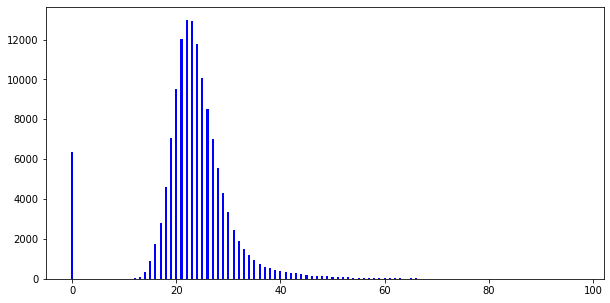

In [177]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(rango_edades['edad'], rango_edades['cantidad'], color ='blue',  
        width = 0.4) 

### Distribucion Sexo

In [178]:
deportista_df['genero'].value_counts()


1    101590
2     33981
Name: genero, dtype: int64

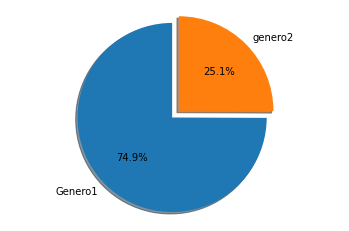

In [179]:
fig1, ax1 = plt.subplots()

labels = 'Genero1', 'genero2'
explode = (0, 0.1) 

ax1.pie(deportista_df['genero'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Cantidad de participantes por Pais


In [285]:
deportistas_paises = deportista_df.merge(equipos_df, left_on='equipo_id', right_on='id', how='inner')
deportistas_paises

,deportista_id,nombre,genero,edad,altura,peso,equipo_id,id,equipo,sigla
0,1,A Dijiang,1,24,180,80.0,199,199,China,CHN
1,2,A Lamusi,1,23,170,60.0,199,199,China,CHN
2,602,Abudoureheman,1,22,182,75.0,199,199,China,CHN
3,1463,Ai Linuer,1,25,160,62.0,199,199,China,CHN
4,1464,Ai Yanhan,2,14,168,54.0,199,199,China,CHN
...,...,...,...,...,...,...,...,...,...,...
135423,131731,Joseph Warwick Wright,1,31,0,0.0,909,909,Sea Dog-2,GBR
135424,130140,Erich WichmannHarbeck,1,35,0,0.0,616,616,Mainz,CHI
135425,133883,Valentin Alekseyevich Zamotaykin,1,24,178,84.0,297,297,Druzhba,URS
135426,134439,Zhang Dan,2,16,167,48.0,202,202,China-3,CHN


In [286]:
deportistas_paises2 = pd.DataFrame(deportistas_paises['sigla'].value_counts()).reset_index()
deportistas_paises2.columns =['pais', 'cantidad']
deportistas_paises2.head(10)

,pais,cantidad
0,USA,9621
1,GBR,6244
2,FRA,6161
3,ITA,4918
4,CAN,4789
5,GER,4612
6,JPN,4066
7,AUS,3799
8,SWE,3790
9,POL,2966


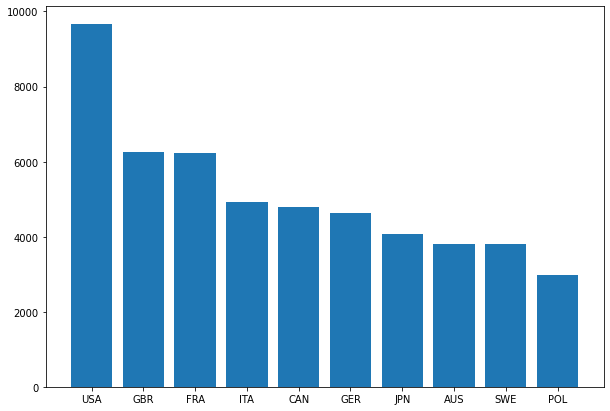

In [284]:
pais = deportistas_paises2['pais']
cantidad = deportistas_paises2['cantidad']
  
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.bar(pais[0:10], cantidad[0:10]) 
  
# Show Plot 
plt.show() 

### Top 20 deportistas mas medallas

In [290]:
medals_df = resultados_df.groupby(['deportista_id'])[['medalla']].count().reset_index()

In [291]:
deportistas_medallas = deportista_df.merge(medals_df, left_on='deportista_id', right_on='deportista_id')
deportistas_medallas_paises  = deportistas_medallas.merge(equipos_df, left_on='equipo_id', right_on='id')

In [292]:
deportistas_medallas_paises.sort_values(by='medalla', ascending=False).head(20)

,deportista_id,nombre,genero,edad,altura,peso,equipo_id,medalla,id,equipo,sigla
13674,94406,Michael Fred Phelps,1,15,193,91.0,1096,28,1096,United States,USA
51155,67046,Larysa Semenivna Latynina Diriy,2,21,161,52.0,978,18,978,Soviet Union,URS
49943,4198,Nikolay Yefimovich Andrianov,1,19,166,60.0,978,15,978,Soviet Union,URS
52010,109161,Borys Anfiyanovych Shakhlin,1,24,171,71.0,978,13,978,Soviet Union,URS
37035,74420,Edoardo Mangiarotti,1,17,0,0.0,507,13,507,Italy,ITA
81303,89187,Takashi Ono,1,20,160,58.0,514,13,514,Japan,JPN
18808,11951,Ole Einar Bjrndalen,1,20,178,65.0,742,13,742,Norway,NOR
17677,87390,Paavo Johannes Nurmi,1,22,174,65.0,350,12,350,Finland,FIN
15340,119922,Jennifer Elisabeth Jenny Thompson Cumpelik,2,19,177,69.0,1096,12,1096,United States,USA
8902,23426,Natalie Anne Coughlin Hall,2,21,173,63.0,1096,12,1096,United States,USA


### Medallas por pais top 20


In [293]:
top_medallas = deportistas_medallas_paises.groupby(['sigla'])[['medalla']].sum()
top_medallas.reset_index(inplace=True)
top_medallas.sort_values(by='medalla', ascending=False).head(20)

,sigla,medalla
214,USA,5643
212,URS,2660
72,GBR,2045
77,GER,2045
67,FRA,1785
98,ITA,1627
191,SWE,1537
36,CAN,1347
12,AUS,1314
88,HUN,1131
